# Analyse Factorielle des Correspondances

L'AFC a ici pour but de décrire un fichier de données.
Celui-ci est extrait du site de Ricco Rakotomalala (Université Lyon 2) :
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/media_prof_afc.xls
Nous partons d'un fichier texte intitulé "ca_data.txt"
On importe la librairie pandas pour charger les données, ainsi que la classe CA du package fanalysis.
Les données sont transformées en matrice de type numpy.ndarray.

Les données doivent se présenter sous forme de tableau croisé, avec des fréquences absolues (effectifs de chaque cellule).

In [1]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
%matplotlib inline

In [28]:
df = pd.read_excel("media_prof_afc.xls")
df

,Prof,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
0,Agriculteur,96,118,2,71,50,17
1,Petit.Patr.,122,136,11,76,49,41
2,Prof.Cad.Sup,193,184,74,63,103,79
3,Prof.Int.,360,365,63,145,141,184
4,Employe,511,593,57,217,172,306
5,Ouvr.Qualif.,385,457,42,174,104,220
6,Ouvr.Non-Qual.,156,185,8,69,42,85
7,Inactif,1474,1931,181,852,642,782


L'exécution de la méthode my_ca.fit(X) provoque a minima le calcul des attributs :
 * my\_ca.eig\_ : valeurs propres
 * my\_ca.row\_coord\_ : coordonnées des points lignes
 * my\_ca.col\_coord\_ : coordonnées des points colonnes

In [3]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values)

In [4]:
df.iloc[:, :]

,Prof,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
0,Agriculteur,96,118,2,71,50,17
1,Petit.Patr.,122,136,11,76,49,41
2,Prof.Cad.Sup,193,184,74,63,103,79
3,Prof.Int.,360,365,63,145,141,184
4,Employe,511,593,57,217,172,306
5,Ouvr.Qualif.,385,457,42,174,104,220
6,Ouvr.Non-Qual.,156,185,8,69,42,85
7,Inactif,1474,1931,181,852,642,782


In [5]:
my_ca.fit(np.array(df.iloc[:, 1:]))
## Analyse des valeurs propres

CA(col_labels=array(['Prof', 'Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   row_labels=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64))

L'attribut my\_ca.eig\_ contient :
 * en 1ère ligne : les valeurs propres en valeur absolue
 * en 2ème ligne : les valeurs propres en pourcentage de la variance totale
 * en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [6]:
print(my_ca.eig_)

[[1.38572868e-02 7.21068498e-03 8.24731391e-04 3.03851641e-04
  8.26930155e-05]
 [6.21981806e+01 3.23650288e+01 3.70179190e+00 1.36383258e+00
  3.71166101e-01]
 [6.21981806e+01 9.45632094e+01 9.82650013e+01 9.96288339e+01
  1.00000000e+02]]


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

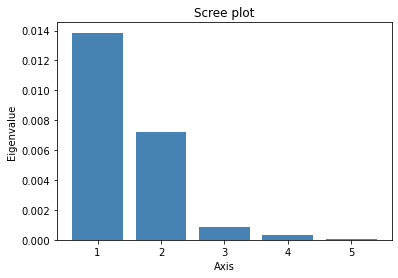

In [7]:
my_ca.plot_eigenvalues()

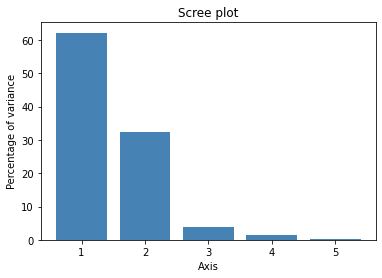

In [8]:
my_ca.plot_eigenvalues(type="percentage")

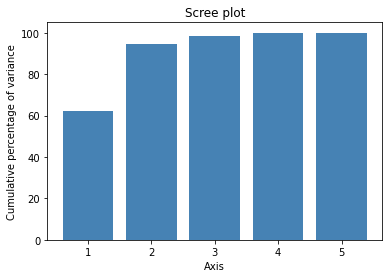

In [9]:
my_ca.plot_eigenvalues(type="cumulative")

Quand l'objet my\_ca a été instancié, son paramètre stats a reçu la valeur True par défaut.
En conséquence, lors de l'exécution de la méthode my\_ca.fit(X), les statistiques suivantes ont été calculées :

 * my\_ca.row\_contrib\_ : contributions des points lignes à la variance de l'axe
 * my\_ca.col\_contrib\_ : contributions des points colonnes à la variance de l'axe
 * my\_ca.row\_cos2\_ : cosinus carrés des points lignes
 * my\_ca.col\_cos2\_ : cosinus carrés des points colonnes
 
Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il aurait fallu instancier :
my\_ca = CA(stats=False)

Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre n_components avec par exemple :
my\_ca = CA(n_components=3)

## Extraction des statistiques sur les points lignes

### Export de la totalité des données lignes vers une DataFrame pandas

On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points lignes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).

In [10]:
df_rows = my_ca.row_topandas()

In [11]:
print(df_rows)

   row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
0        0.166150        0.309612       -0.071838       -0.014433   
1        0.068377        0.143151       -0.064422        0.020370   
2       -0.429976        0.060873       -0.003021        0.016811   
3       -0.106603       -0.032597       -0.030898       -0.025333   
4        0.015729       -0.095469       -0.005087       -0.020294   
5        0.043713       -0.101379       -0.019323        0.035411   
6        0.117797       -0.094864       -0.039728        0.003493   
7        0.032584        0.033395        0.025968        0.000553   

   row_coord_dim5  row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
0        0.021440          5.692772         37.989221         17.881318   
1       -0.025687          1.184762          9.979255         17.670138   
2        0.011233         74.957901          2.887188          0.062182   
3       -0.011955          8.327911          1.496416         11.755243   
4  

# Statistiques pour les points lignes

In [12]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[ 0.16614986  0.30961174 -0.07183812 -0.01443258  0.02144011]
 [ 0.06837709  0.14315064 -0.0644217   0.02037032 -0.02568674]
 [-0.42997558  0.06087258 -0.00302124  0.01681116  0.01123318]
 [-0.10660251 -0.03259679 -0.03089814 -0.02533304 -0.01195531]
 [ 0.01572857 -0.09546893 -0.00508681 -0.02029446  0.00346168]
 [ 0.04371252 -0.1013786  -0.01932335  0.03541129 -0.00173011]
 [ 0.11779685 -0.09486419 -0.03972798  0.00349309  0.02248439]
 [ 0.0325837   0.03339524  0.02596802  0.00055285 -0.00093525]]


In [13]:
# Contributions des points lignes
print(my_ca.row_contrib_)

[[5.69277232e+00 3.79892214e+01 1.78813176e+01 1.95897194e+00
  1.58850001e+01]
 [1.18476189e+00 9.97925473e+00 1.76701383e+01 4.79537182e+00
  2.80180099e+01]
 [7.49579010e+01 2.88718751e+00 6.21822742e-02 5.22566729e+00
  8.57323474e+00]
 [8.32791077e+00 1.49641640e+00 1.17552426e+01 2.14482814e+01
  1.75522340e+01]
 [2.67471308e-01 1.89375750e+01 4.70061383e-01 2.03081396e+01
  2.17111555e+00]
 [1.53829776e+00 1.59009442e+01 5.05078817e+00 4.60393024e+01
  4.03817678e-01]
 [4.40539088e+00 5.49064526e+00 8.41929638e+00 1.76666131e-01
  2.68960553e+01]
 [3.62549412e+00 7.31875549e+00 3.86909733e+01 4.75993841e-02
  5.00532813e-01]]


In [14]:
# Cos2 des points lignes
print(my_ca.row_cos2_)

[[2.13511817e-01 7.41407219e-01 3.99146143e-02 1.61105251e-03
  3.55529749e-03]
 [1.53835147e-01 6.74249941e-01 1.36552219e-01 1.36530650e-02
  2.17096289e-02]
 [9.78183352e-01 1.96054203e-02 4.82951781e-05 1.49529881e-03
  6.67633606e-04]
 [8.02207290e-01 7.50069172e-02 6.73932587e-02 4.53029435e-02
  1.00895911e-02]
 [2.52142692e-02 9.28948989e-01 2.63729115e-03 4.19780929e-02
  1.22135734e-03]
 [1.38274790e-01 7.43744603e-01 2.70206674e-02 9.07433300e-02
  2.16610023e-04]
 [5.55680182e-01 3.60381228e-01 6.32048750e-02 4.88626636e-04
  2.02450881e-02]
 [3.72204454e-01 3.90975835e-01 2.36405913e-01 1.07151702e-04
  3.06646165e-04]]


## Extraction des statistiques sur les points colonnes

### Export de la totalité des données colonnes vers une DataFrame pandas

On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points colonnes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).

In [15]:
df_cols = my_ca.col_topandas()

In [16]:
print(df_cols)

      col_coord_dim1  col_coord_dim2  col_coord_dim3  col_coord_dim4  \
col0       -0.014940       -0.022106       -0.046702       -0.002662   
col1        0.053283       -0.002081        0.016453        0.011218   
col2       -0.540675        0.006207        0.020542        0.039523   
col3        0.108828        0.109645        0.005228        0.013042   
col4       -0.094813        0.132497        0.018758       -0.038309   
col5        0.009754       -0.161609        0.027141       -0.014518   

      col_coord_dim5  col_contrib_dim1  col_contrib_dim2  col_contrib_dim3  \
col0        0.000680          0.428700          1.803681         70.383604   
col1        0.009850          6.564128          0.019242         10.516012   
col2       -0.006617         74.587719          0.018890          1.809035   
col3       -0.016560         11.501128         22.435641          0.446007   
col4        0.003719          6.823338         25.608027          4.487719   
col5       -0.009147       

In [17]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[-0.01494022 -0.02210596 -0.04670175 -0.00266194  0.00068016]
 [ 0.05328288 -0.002081    0.01645288  0.0112183   0.00985007]
 [-0.54067502  0.00620677  0.02054203  0.03952278 -0.00661745]
 [ 0.10882837  0.10964537  0.00522829  0.01304161 -0.01656044]
 [-0.09481257  0.13249659  0.01875847 -0.03830946  0.0037189 ]
 [ 0.00975363 -0.16160888  0.02714057 -0.01451757 -0.00914728]]


In [18]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[4.28700199e-01 1.80368136e+00 7.03836037e+01 6.20658916e-01
  1.48890251e-01]
 [6.56412758e+00 1.92419243e-02 1.05160124e+01 1.32700380e+01
  3.75915100e+01]
 [7.45877189e+01 1.88897960e-02 1.80903503e+00 1.81763356e+01
  1.87234094e+00]
 [1.15011283e+01 2.24356413e+01 4.46006948e-01 7.53243787e+00
  4.46282147e+01]
 [6.82333790e+00 2.56080275e+01 4.48771875e+00 5.08035174e+01
  1.75915503e+00]
 [9.49870405e-02 5.01145182e+01 1.23576232e+01 9.59701224e+00
  1.39998891e+01]]


In [19]:
# Cos2 des points colonnes
print(my_ca.col_cos2_)

[[7.69561735e-02 1.68479830e-01 7.51961487e-01 2.44301514e-03
  1.59494851e-04]
 [8.50792093e-01 1.29775661e-03 8.11207283e-02 3.77139463e-02
  2.90754756e-02]
 [9.92981084e-01 1.30857685e-04 1.43335889e-03 5.30595256e-03
  1.48747339e-04]
 [4.86642767e-01 4.93976885e-01 1.12317070e-03 6.98857711e-03
  1.12685999e-02]
 [3.16773320e-01 6.18623139e-01 1.23997140e-02 5.17164707e-02
  4.87356154e-04]
 [3.49195247e-03 9.58662728e-01 2.70379173e-02 7.73612354e-03
  3.07127840e-03]]


### Graphiques

2 types de graphiques peuvent être réalisés :

Les mapping classiques qui représentent les points lignes et colonnes sur un plan factoriel
Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe
</p>

#### Graphiques factoriels

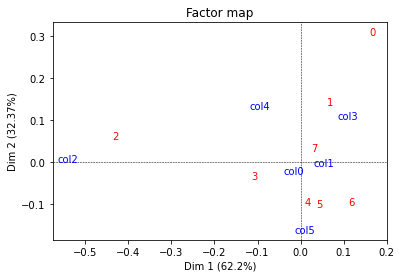

In [20]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2)

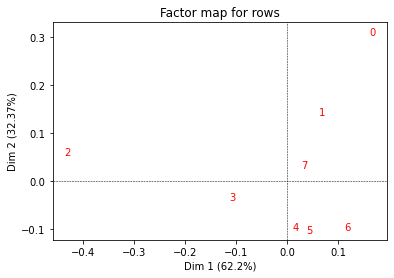

In [21]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

In [3]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=)

NameError: name 'afc' is not defined

### Analyse du 1er axe - Points lignes

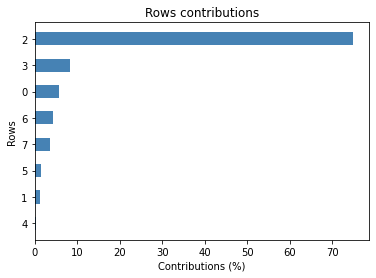

In [23]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

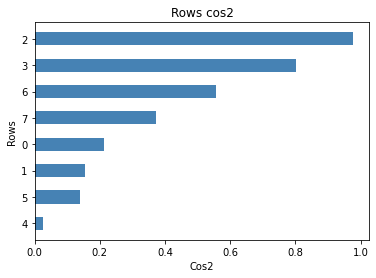

In [24]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

### Analyse du 1er axe - Points colonnes

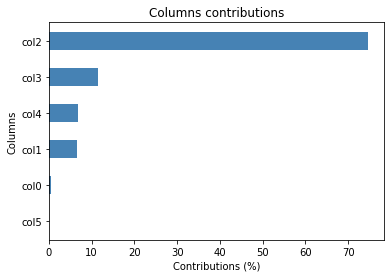

In [25]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1)

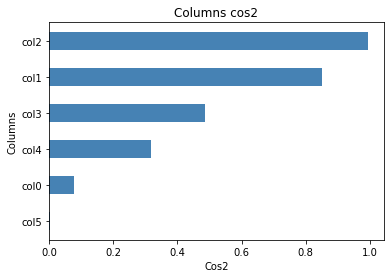

In [26]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1)

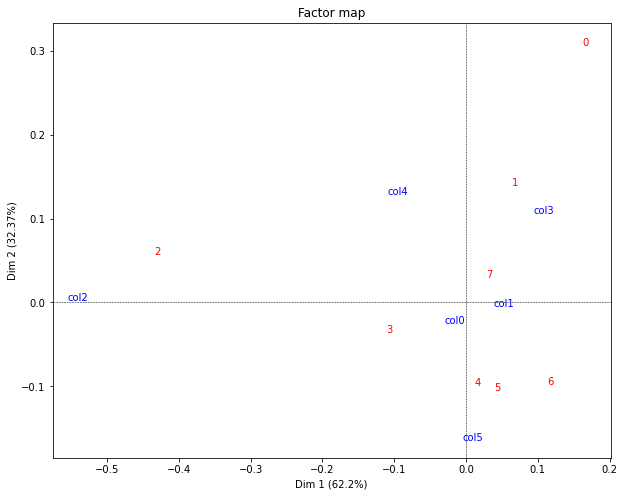

In [27]:
my_ca.mapping(1, 2, figsize=(10, 8))

## Projection de points lignes supplémentaires

La classe CA implémente les méthodes fit, transform et fit_transform bien connues des utilisateurs de scikit-learn.

Ces méthodes vont nous permettre de projetter des points lignes sur les axes factoriels.

Il est ici judicieux de fixer le paramètre stats à False pour gagner en temps de traitement et en ressources mémoire.

In [30]:
my_ca = CA(stats=False)

In [34]:
# Estimation du modèle
my_ca.fit(np.array(df.iloc[:, 1:]))

CA(stats=False)

In [35]:
my_ca.transform(np.array(df.iloc[:, 1:]))

array([[ 0.16614986,  0.30961174, -0.07183812, -0.01443258,  0.02144011],
       [ 0.06837709,  0.14315064, -0.0644217 ,  0.02037032, -0.02568674],
       [-0.42997558,  0.06087258, -0.00302124,  0.01681116,  0.01123318],
       [-0.10660251, -0.03259679, -0.03089814, -0.02533304, -0.01195531],
       [ 0.01572857, -0.09546893, -0.00508681, -0.02029446,  0.00346168],
       [ 0.04371252, -0.1013786 , -0.01932335,  0.03541129, -0.00173011],
       [ 0.11779685, -0.09486419, -0.03972798,  0.00349309,  0.02248439],
       [ 0.0325837 ,  0.03339524,  0.02596802,  0.00055285, -0.00093525]])

In [37]:
# Idem en une seule étape
my_ca.fit_transform(np.array(df.iloc[:, 1:]))

array([[ 0.16614986,  0.30961174, -0.07183812, -0.01443258,  0.02144011],
       [ 0.06837709,  0.14315064, -0.0644217 ,  0.02037032, -0.02568674],
       [-0.42997558,  0.06087258, -0.00302124,  0.01681116,  0.01123318],
       [-0.10660251, -0.03259679, -0.03089814, -0.02533304, -0.01195531],
       [ 0.01572857, -0.09546893, -0.00508681, -0.02029446,  0.00346168],
       [ 0.04371252, -0.1013786 , -0.01932335,  0.03541129, -0.00173011],
       [ 0.11779685, -0.09486419, -0.03972798,  0.00349309,  0.02248439],
       [ 0.0325837 ,  0.03339524,  0.02596802,  0.00055285, -0.00093525]])

In [38]:
# Projection d'une ligne supplémentaire
my_ca.transform([[25, 54, 41, 11, 65, 44]])

array([[-0.85659025,  0.11271178,  0.44021711, -0.19738323, -0.02993141]])